# 导入包和数据

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import mean_absolute_error

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv('./data/train.csv', sep=' ')
test = pd.read_csv('./data/test.csv', sep = ' ')
print(train.shape, test.shape)

(150000, 31) (50000, 30)


# 数据预处理
## 缺失值处理

In [3]:
train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [4]:
train.isnull().any()  # 查看存在空值的列

SaleID               False
name                 False
regDate              False
model                 True
brand                False
bodyType              True
fuelType              True
gearbox               True
power                False
kilometer            False
notRepairedDamage    False
regionCode           False
seller               False
offerType            False
creatDate            False
price                False
v_0                  False
v_1                  False
v_2                  False
v_3                  False
v_4                  False
v_5                  False
v_6                  False
v_7                  False
v_8                  False
v_9                  False
v_10                 False
v_11                 False
v_12                 False
v_13                 False
v_14                 False
dtype: bool

In [5]:
train[['model', 'bodyType', 'fuelType', 'gearbox']].describe()

,model,bodyType,fuelType,gearbox
count,149999.000000,145494.000000,141320.000000,144019.000000
mean,47.129021,1.792369,0.375842,0.224943
std,49.536040,1.760640,0.548677,0.417546
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,0.000000,0.000000
75%,66.000000,3.000000,1.000000,0.000000
max,247.000000,7.000000,6.000000,1.000000


In [6]:
train.fillna(-999, inplace=True)  # 使用-999来填充缺失值
test.fillna(-999, inplace=True)

In [7]:
train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.122047,8.052733,-28.271433,-57.454707,-39.617487,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.609463,7.864956,170.842013,233.346797,195.511002,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,-999.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


## 异常特征处理

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              150000 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           150000 non-null  float64
 6   fuelType           150000 non-null  float64
 7   gearbox            150000 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [13]:
train['notRepairedDamage'] = train['notRepairedDamage'].map(lambda x: -1 if (x == '-') else x)
train['notRepairedDamage'] = train['notRepairedDamage'].map(lambda x: float(x))
test['notRepairedDamage'] = test['notRepairedDamage'].map(lambda x: -1 if (x == '-') else x)
test['notRepairedDamage'] = test['notRepairedDamage'].map(lambda x: float(x))
train['notRepairedDamage'].describe()

count    150000.000000
mean         -0.066727
std           0.503133
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: notRepairedDamage, dtype: float64

# 特征工程

d:\python\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='test_power'>

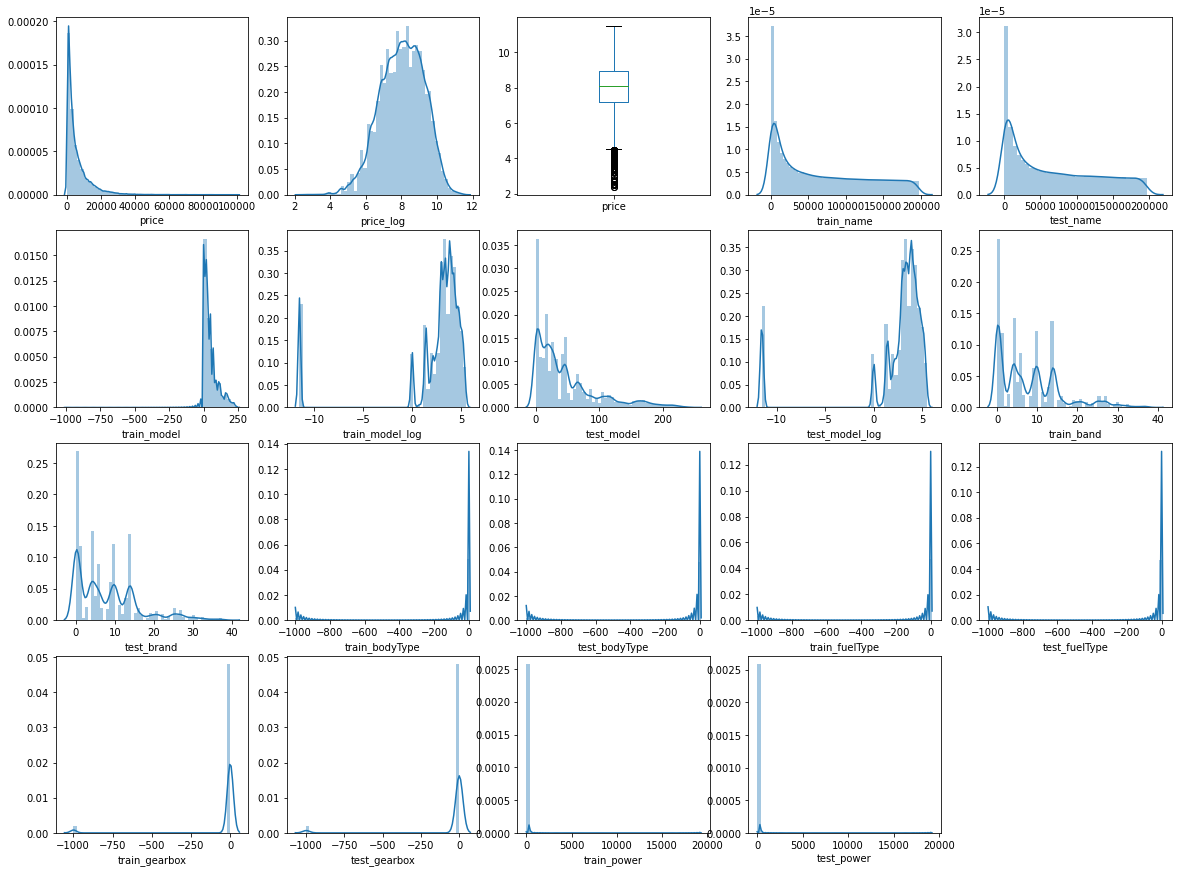

In [8]:
plt.figure(figsize=(20, 15))
plt.subplot(4, 5, 1)
sns.distplot(train['price'])                                      # price分布图
plt.subplot(4, 5, 2)
sns.distplot(np.log(train['price']), axlabel = 'price_log')      # price取log变换后的分布图
plt.subplot(4, 5, 3)
np.log(train['price']).plot.box()                                # price取log变换后的箱型图
plt.subplot(4, 5, 4)
sns.distplot(train['name'], axlabel='train_name')   # 训练集中已经脱敏的汽车交易名称
plt.subplot(4, 5, 5)
sns.distplot(test['name'], axlabel='test_name')     # 测试集中已经脱敏的汽车交易名称
plt.subplot(4, 5, 6)
sns.distplot(train['model'], axlabel='train_model') # 脱敏后的汽车类型分布 
plt.subplot(4, 5, 7)
sns.distplot(np.log(train['model'] + 0.00001), axlabel='train_model_log')  # 测试集中model取log变换后的分布，0.00001为了防止出现log0
plt.subplot(4, 5, 8)
sns.distplot(test['model'], axlabel='test_model')
plt.subplot(4, 5, 9)
sns.distplot(np.log(test['model'] + 0.00001), axlabel='test_model_log')
plt.subplot(4, 5, 10)
sns.distplot(train['brand'], axlabel='train_band')
plt.subplot(4, 5, 11)
sns.distplot(test['brand'], axlabel='test_brand')
plt.subplot(4, 5, 12)
sns.distplot(train['bodyType'], axlabel='train_bodyType')
plt.subplot(4, 5, 13)
sns.distplot(test['bodyType'], axlabel='test_bodyType')
plt.subplot(4, 5, 14)
sns.distplot(train['fuelType'], axlabel='train_fuelType')
plt.subplot(4, 5, 15)
sns.distplot(test['fuelType'], axlabel='test_fuelType')
plt.subplot(4, 5, 16)
sns.distplot(train['gearbox'], axlabel='train_gearbox')
plt.subplot(4, 5, 17)
sns.distplot(test['gearbox'], axlabel='test_gearbox')
plt.subplot(4, 5, 18)
sns.distplot(train['power'], axlabel='train_power')
plt.subplot(4, 5, 19)
sns.distplot(test['power'], axlabel='test_power')

由上图可知：
- 标签price的分布为长尾分布，对其取log变换后，数据分布接近正态分布
- train和test集上的model特征分布不一致，对其分别取log变换后，两者的分布大致相同
- 图中其他特征在train和test集上的分布基本一致

In [9]:
price = train['price']
price_log = np.log(price)

In [10]:
train['model_log'] = np.log(train['model'] + 0.00001)
test['model_log'] = np.log(test['model'] + 0.00001)

d:\python\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


d:\python\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
d:\python\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
d:\python\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='test_offerType'>

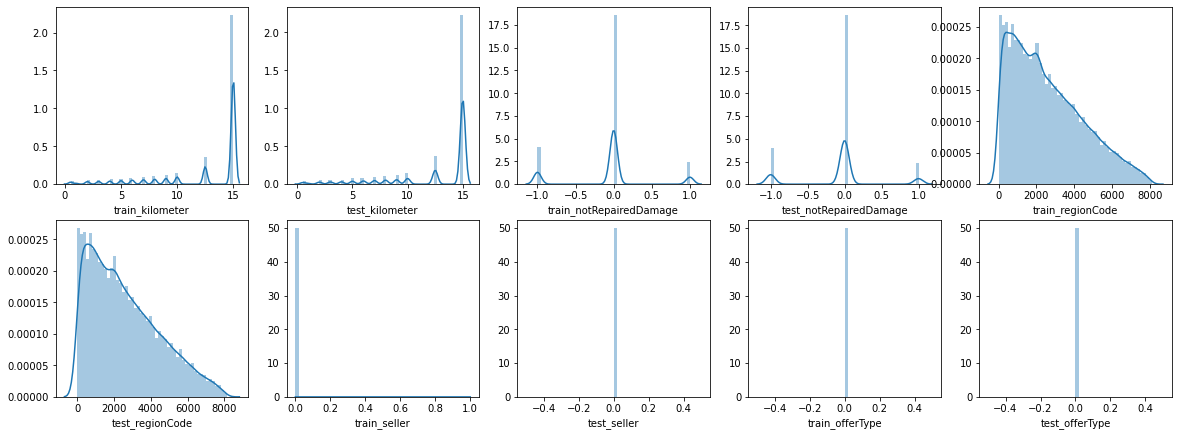

In [14]:
plt.figure(figsize=(20,15))
plt.subplot(4,5,1)
sns.distplot(train['kilometer'],axlabel='train_kilometer')
plt.subplot(4,5,2)
sns.distplot(test['kilometer'],axlabel='test_kilometer')
plt.subplot(4,5,3)
sns.distplot(train['notRepairedDamage'],axlabel='train_notRepairedDamage')
plt.subplot(4,5,4)
sns.distplot(test['notRepairedDamage'],axlabel='test_notRepairedDamage')
plt.subplot(4,5,5)
sns.distplot(train['regionCode'],axlabel='train_regionCode')
plt.subplot(4,5,6)
sns.distplot(test['regionCode'],axlabel='test_regionCode')
plt.subplot(4,5,7)
sns.distplot(train['seller'],axlabel='train_seller')
plt.subplot(4,5,8)
sns.distplot(test['seller'],axlabel='test_seller')
plt.subplot(4,5,9)
sns.distplot(train['offerType'],axlabel='train_offerType')
plt.subplot(4,5,10)
sns.distplot(test['offerType'],axlabel='test_offerType')

seller和offterType在训练集和测试集上就一个值，考虑删除

<AxesSubplot:xlabel='test_v7'>

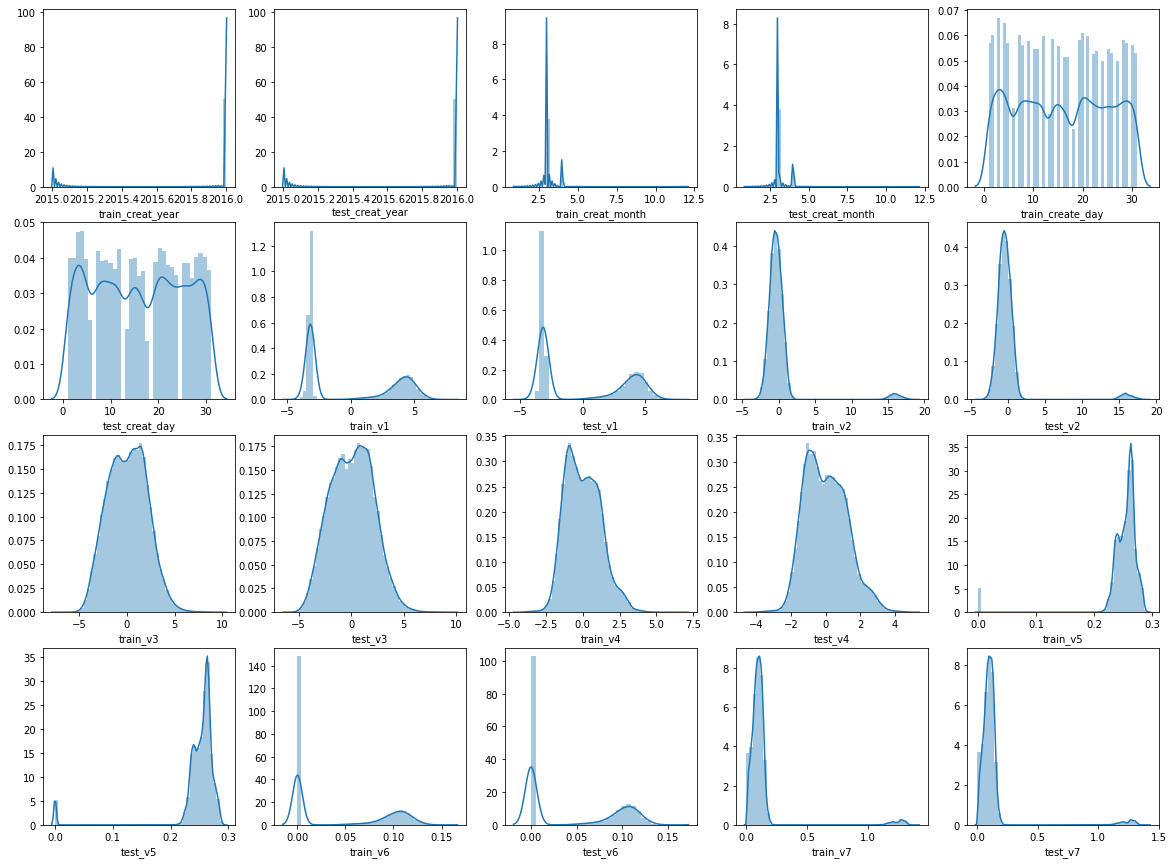

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(4,5,1)
sns.distplot(train['creatDate'].map(lambda x: int(str(x)[:4])),axlabel='train_creat_year')
plt.subplot(4,5,2)
sns.distplot(train['creatDate'].map(lambda x: int(str(x)[:4])),axlabel='test_creat_year')
plt.subplot(4,5,3)
sns.distplot(train['creatDate'].map(lambda x: int(str(x)[4:6])),axlabel='train_creat_month')
plt.subplot(4,5,4)
sns.distplot(test['creatDate'].map(lambda x: int(str(x)[4:6])),axlabel = 'test_creat_month')
plt.subplot(4,5,5)
sns.distplot(train['creatDate'].map(lambda x: int(str(x)[6:])),axlabel='train_create_day')
plt.subplot(4,5,6)
sns.distplot(test['creatDate'].map(lambda x: int(str(x)[6:])),axlabel='test_creat_day')
plt.subplot(4,5,7)
sns.distplot(train['v_1'],axlabel='train_v1')
plt.subplot(4,5,8)
sns.distplot(test['v_1'],axlabel='test_v1')
plt.subplot(4,5,9)
sns.distplot(train['v_2'],axlabel='train_v2')
plt.subplot(4,5,10)
sns.distplot(test['v_2'],axlabel='test_v2')
plt.subplot(4,5,11)
sns.distplot(train['v_3'],axlabel='train_v3')
plt.subplot(4,5,12)
sns.distplot(test['v_3'],axlabel='test_v3')
plt.subplot(4,5,13)
sns.distplot(train['v_4'],axlabel='train_v4')
plt.subplot(4,5,14)
sns.distplot(test['v_4'],axlabel='test_v4')
plt.subplot(4,5,15)
sns.distplot(train['v_5'],axlabel='train_v5')
plt.subplot(4,5,16)
sns.distplot(test['v_5'],axlabel='test_v5')
plt.subplot(4,5,17)
sns.distplot(train['v_6'],axlabel='train_v6')
plt.subplot(4,5,18)
sns.distplot(test['v_6'],axlabel='test_v6')
plt.subplot(4,5,19)
sns.distplot(train['v_7'],axlabel='train_v7')
plt.subplot(4,5,20)
sns.distplot(test['v_7'],axlabel='test_v7')

上述中特征在两个数据集上的分布基本一致，可考虑构造creatDate的年、月、日特征

In [16]:
train['creat_year'] = train['creatDate'].map(lambda x: int(str(x)[:4]))
train['creat_month'] = train['creatDate'].map(lambda x: int(str(x)[4:6]))    
train['creat_day'] = train['creatDate'].map(lambda x: int(str(x)[6:]))
test['creat_year'] = test['creatDate'].map(lambda x: int(str(x)[:4]))
test['creat_month'] = test['creatDate'].map(lambda x: int(str(x)[4:6]))    
test['creat_day'] = test['creatDate'].map(lambda x: int(str(x)[6:]))

再考虑通过regDate和creatDate两个时间特征来构造新的特征

In [18]:
train['year_var'] = train['creatDate'].map(lambda x: int(str(x)[:4])) - train['regDate'].map(lambda x: int(str(x)[:4]))
train['month_var'] = train['creatDate'].map(lambda x: int(str(x)[4:6])) - train['regDate'].map(lambda x: int(str(x)[4:6]))
train['day_var'] = train['creatDate'].map(lambda x: int(str(x)[6:])) - train['regDate'].map(lambda x: int(str(x)[6:]))
test['year_var'] = test['creatDate'].map(lambda x: int(str(x)[:4])) -  test['regDate'].map(lambda x: int(str(x)[:4]))
test['month_var'] = test['creatDate'].map(lambda x: int(str(x)[4:6])) -  test['regDate'].map(lambda x: int(str(x)[4:6]))
test['day_var'] = test['creatDate'].map(lambda x: int(str(x)[6:])) -  test['regDate'].map(lambda x: int(str(x)[6:]))

<AxesSubplot:xlabel='test_day_var'>

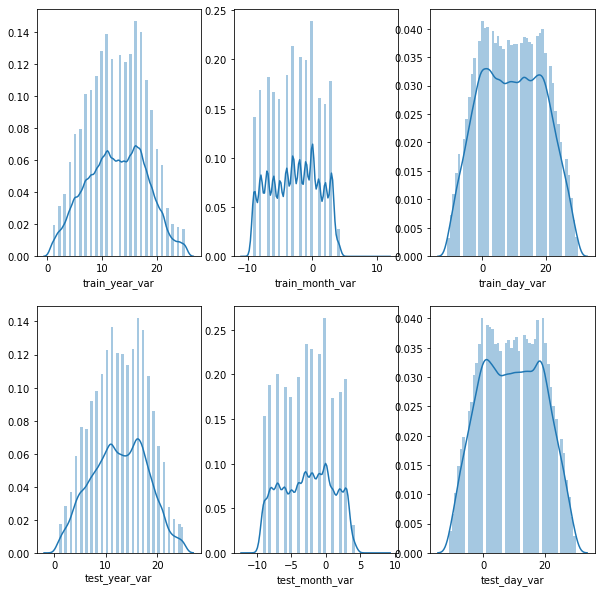

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
sns.distplot(train['year_var'],axlabel='train_year_var')
plt.subplot(2,3,2)
sns.distplot(train['month_var'],axlabel='train_month_var')
plt.subplot(2,3,3)
sns.distplot(train['day_var'],axlabel='train_day_var')
plt.subplot(2,3,4)
sns.distplot(test['year_var'],axlabel='test_year_var')
plt.subplot(2,3,5)
sns.distplot(test['month_var'],axlabel='test_month_var')
plt.subplot(2,3,6)
sns.distplot(test['day_var'],axlabel='test_day_var')

上图的特征在两个数据集中分布基本一致

<AxesSubplot:xlabel='train_v14_28'>

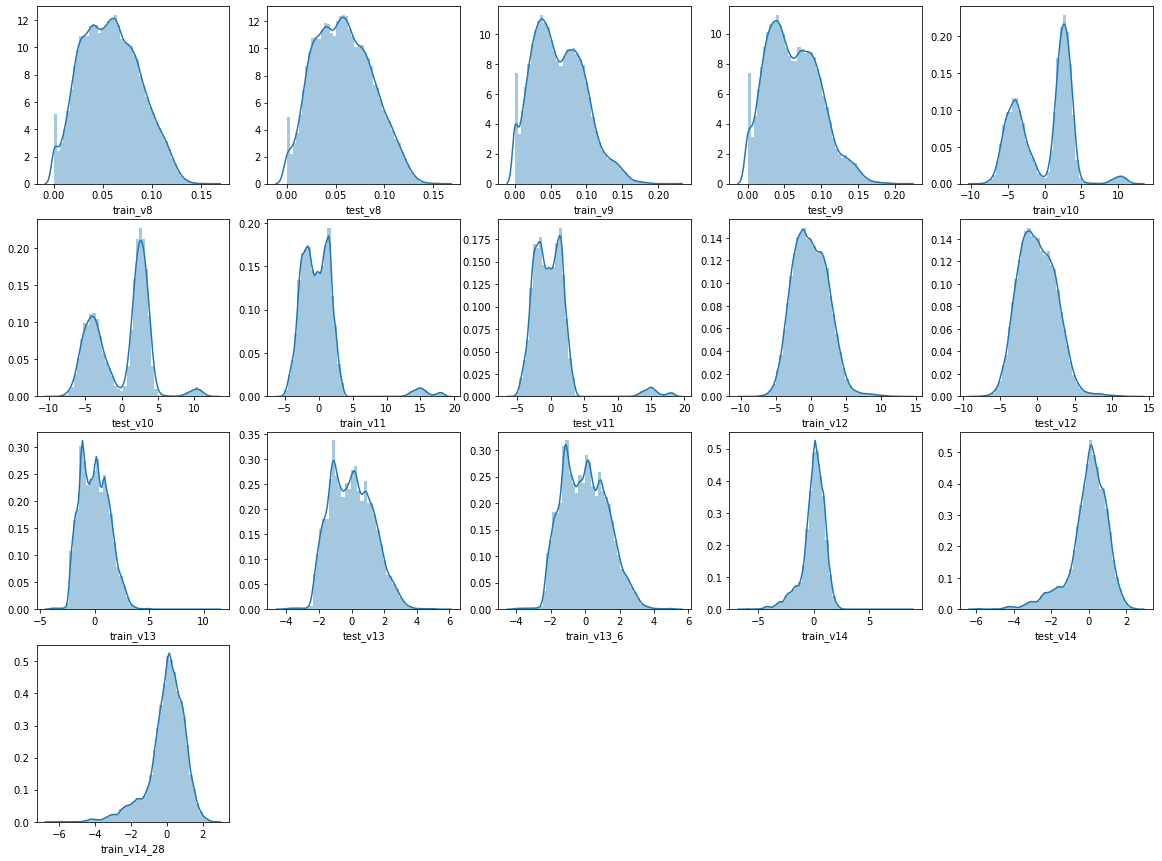

In [17]:
plt.figure(figsize=(20,15))
plt.subplot(4,5,1)
sns.distplot(train['v_8'],axlabel='train_v8')
plt.subplot(4,5,2)
sns.distplot(test['v_8'],axlabel='test_v8')
plt.subplot(4,5,3)
sns.distplot(train['v_9'],axlabel='train_v9')
plt.subplot(4,5,4)
sns.distplot(test['v_9'],axlabel='test_v9')
plt.subplot(4,5,5)
sns.distplot(train['v_10'],axlabel='train_v10')
plt.subplot(4,5,6)
sns.distplot(test['v_10'],axlabel='test_v10')
plt.subplot(4,5,7)
sns.distplot(train['v_11'],axlabel='train_v11')
plt.subplot(4,5,8)
sns.distplot(test['v_11'],axlabel='test_v11')
plt.subplot(4,5,9)
sns.distplot(train['v_12'],axlabel='train_v12')
plt.subplot(4,5,10)
sns.distplot(test['v_12'],axlabel='test_v12')
plt.subplot(4,5,11)
sns.distplot(train['v_13'],axlabel='train_v13')
plt.subplot(4,5,12)
sns.distplot(test['v_13'],axlabel='test_v13')
plt.subplot(4,5,13)
sns.distplot(train['v_13'][train['v_13']<6],axlabel='train_v13_6')       # 在train集中筛选
plt.subplot(4,5,14)
sns.distplot(train['v_14'],axlabel='train_v14')
plt.subplot(4,5,15)
sns.distplot(test['v_14'],axlabel='test_v14')
plt.subplot(4,5,16)
sns.distplot(train['v_14'][train['v_14']<2.8],axlabel='train_v14_28')

上图中可知：
- v_13和v_14特征在train和test集上分布稍有差异
- 在train集中筛选后的数据分布与test集的数据分布大致相同

**根据题目要求，以及前述的探索分析，还需进行以下的处理：**

1. 从train集中筛选数据
    - power值小于600
    - seller为0
    - offerType为0
    - v_13小于6
    - v_14小于2.8
2. 删除不需要的特征
    
    model、seller、offerType
  
  
3. 提取出标签price
4. test中power大于600的设置为600

In [20]:
mask = (train['power']<600) & (train['seller']==0) & (train['offerType']==0) & (train['v_13']<6) & (train['v_14']<2.8)

In [21]:
train = train[mask]
train

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_12,v_13,v_14,model_log,creat_year,creat_month,creat_day,year_var,month_var,day_var
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,-2.420821,0.795292,0.914762,3.401198,2016,4,4,12,0,2
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,-1.030483,-1.722674,0.245522,3.688880,2016,3,9,13,0,8
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,1.565330,-0.832687,-0.229963,4.744932,2016,4,2,12,0,-1
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,-0.501868,-2.438353,-0.478699,4.691348,2016,3,12,20,-6,4
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.931110,2.834518,1.923482,4.700480,2016,3,13,4,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.589167,-1.304370,-0.302592,4.795791,2016,3,27,16,-3,20
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,2.553994,0.924196,-0.272160,4.753590,2016,3,12,7,-8,10
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,2.290197,1.891922,0.414931,4.094345,2016,3,28,6,-7,25
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,1.414937,0.431981,-1.659014,3.526361,2016,4,1,10,1,-11


In [22]:
price_log = price_log[mask]
price_log

0         7.522941
1         8.188689
2         8.735847
3         7.783224
4         8.556414
            ...   
149995    8.682708
149996    9.159047
149997    8.922658
149998    8.516993
149999    8.455318
Name: price, Length: 149848, dtype: float64

In [23]:
train.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'model_log', 'creat_year', 'creat_month', 'creat_day',
       'year_var', 'month_var', 'day_var'],
      dtype='object')

In [24]:
test.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14', 'model_log', 'creat_year', 'creat_month', 'creat_day',
       'year_var', 'month_var', 'day_var'],
      dtype='object')

In [25]:
del train['price']
del train['model']
del train['seller']
del train['offerType']
del test['model']
del test['seller']
del test['offerType']

In [26]:
train.columns

Index(['SaleID', 'name', 'regDate', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'creatDate',
       'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'model_log', 'creat_year',
       'creat_month', 'creat_day', 'year_var', 'month_var', 'day_var'],
      dtype='object')

# 建模与评估

In [27]:
def build_model_lgb(x_train, y_train):
    model = lgb.LGBMRegressor(n_estimators=2000, num_leaves=90, max_depth=13)
    model.fit(x_train, y_train)
    return model 

In [31]:
def run_model_lgb(train, price_log):
    x_train, x_val, y_train, y_val = train_test_split(train, price_log, test_size=0.3, random_state=2020) 
    print('Train lgb ...')
    model_lgb = build_model_lgb(x_train, y_train)
    train_lgb = model_lgb.predict(x_train)
    train_mae_lgb = mean_absolute_error(np.exp(y_train), np.exp(train_lgb))
    print('MAE of train with lgb:', train_mae_lgb)
    val_lgb = model_lgb.predict(x_val)
    val_mae_lgb = mean_absolute_error(np.exp(y_val), np.exp(val_lgb))
    print('MAE of val with lgb:', val_mae_lgb)

In [32]:
run_model_lgb(train, price_log)

Train lgb ...
MAE of train with lgb: 151.61307236431523
MAE of val with lgb: 506.141150833253


In [33]:
# 查看特征的重要程度
for name, value in zip(train.columns, model_lgb.feature_importances_):
    print(name, value)

SaleID 10077
name 7891
regDate 9803
brand 2951
bodyType 1033
fuelType 799
gearbox 521
power 5857
kilometer 2530
notRepairedDamage 968
regionCode 10163
creatDate 5408
v_0 7241
v_1 8249
v_2 6296
v_3 7916
v_4 5081
v_5 4864
v_6 6793
v_7 6089
v_8 8398
v_9 4876
v_10 6922
v_11 8656
v_12 6882
v_13 5367
v_14 7781
model_log 3879
creat_year 0
creat_month 1
creat_day 3789
year_var 987
month_var 4420
day_var 5512


creat_year和creat_month的重要分别为0和1，将这两个特征删除

In [34]:
train_ = train.copy()
test_ = test.copy() 

del train['creat_year']
del train['creat_month']
del test['creat_year']
del test['creat_month']

In [ ]:
model_lgb.fit(train_, price_log)
result = model_lgb.predict(test_)
result = np.exp(result)
result = pd.Series(result)
result = pd.concat([test_['SaleID'], result], axis=1)
result.columns = ['SaleID', 'price']
result.to_csv('./data/submit.csv', index=False)